# Testing NFW halo reparametrisation

In this notebook, we test a few ideas to see if we can reparametrize the density
at a given point of an NFW halo in terms of quantities that do not involve resolving each halo.

What we need:
- NFW profile as a function of Mass and r, assuming some scaling function for the concentration at a given redshift z.

- Generate a bunch of halos of different masses, we can also have a bunch of particles at different radii

- Try to guess (r, M) from (rho, fscalar)

In [ ]:
# Installing stuff we need
!apt-get install swig
!pip install pyccl

In [1]:
%pylab inline
import pyccl as ccl
from pyccl.halos.profiles import HaloProfileNFW
from pyccl.halos.concentration import ConcentrationDiemer15
from pyccl.halos.massdef import MassDef200c

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
cosmo = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
    transfer_function='bbks')
concentration = ConcentrationDiemer15()
profile = HaloProfileNFW(concentration)

In [3]:
def rho(r, M):
  return profile.real(cosmo, r, M, 1.0, MassDef200c())

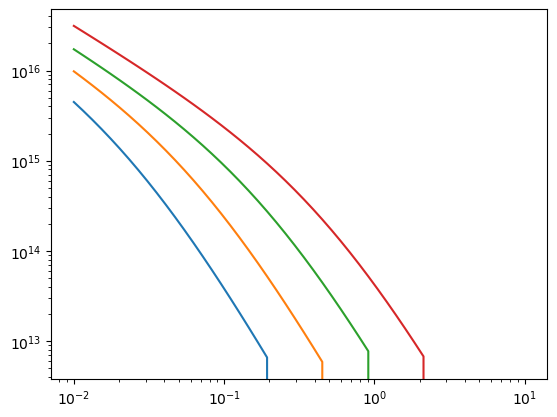

In [4]:
r = np.logspace(-2,1)

for M in [1e12, 1e13, 1e14, 1e15]:
  loglog(r, rho(r, M))

Now we also need to evaluate this fscalar thing

In [5]:
def fscalar(r, M):
  r_m = MassDef200c().get_radius(cosmo, M, 1.0) / 1.
  c_m = concentration.get_concentration(cosmo, M, 1.0, MassDef200c())
  r_s = r_m / c_m
  rho_s = profile._norm(M, r_s, c_m)
  return rho_s * r_s * log(r/r_s)/((r/r_s)**2 - 1)

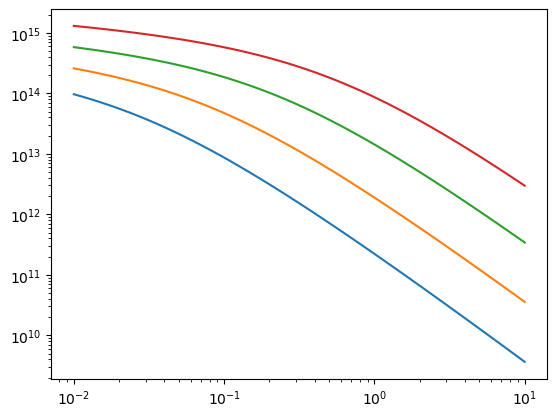

In [6]:
r = np.logspace(-2,1)

for M in [1e12, 1e13, 1e14, 1e15]:
  loglog(r, fscalar(r, M))

In [7]:
r,m = meshgrid(logspace(-2,0), logspace(12,15))

In [8]:
f = fscalar(r.flatten(),m.flatten())

/tmp/ipykernel_10965/1712134820.py:4: RuntimeWarning: divide by zero encountered in log10
  log10(np.stack([rho(logspace(-2,0) ,i) for i in logspace(12,15)], axis=0)), 16,cmap='magma')


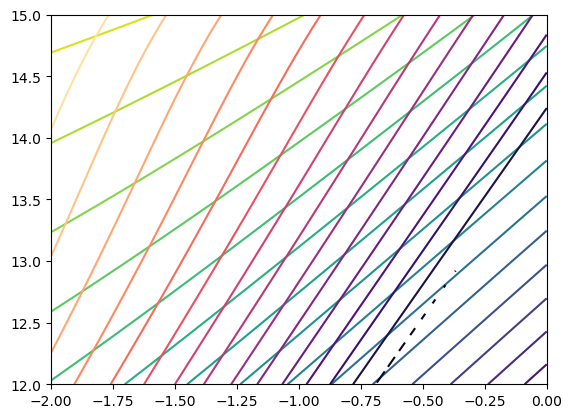

In [9]:
contour(log10(r), log10(m), 
        log10(f).reshape(50,50), 16)
contour(log10(r), log10(m), 
        log10(np.stack([rho(logspace(-2,0) ,i) for i in logspace(12,15)], axis=0)), 16,cmap='magma')

In [34]:
r,m = meshgrid(logspace(-3,0,100), logspace(10,15,100))

In [35]:
f = fscalar(r.flatten(),m.flatten())
rh = np.stack([rho(logspace(-3,0,100) ,i) for i in logspace(10,15,100)], axis=0)

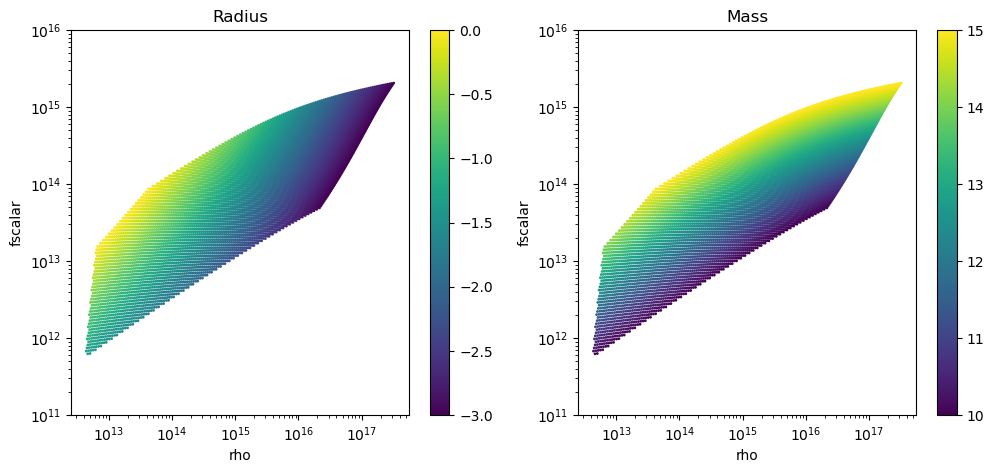

In [38]:
figure(figsize=[12,5])
subplot(121)

scatter((rh.flatten()),
        (f.flatten()),
        c=log10(r.flatten()),s=1.0)
xlabel('rho')
ylabel('fscalar')
xscale('log')
yscale('log')
colorbar()
title('Radius')
ylim(1e11,1e16)

subplot(122)

scatter((rh.flatten()),
        (f.flatten()),
        c=log10(m.flatten()),s=1.0)
xlabel('rho')
ylabel('fscalar')
xscale('log')
yscale('log')
colorbar()
title('Mass')
ylim(1e11,1e16);

In [49]:
mask = (log10(rh.flatten()) > 15) & (log10(rh.flatten()) < 15.1)
#mask &= (log10(f.flatten()) > 14) & (log10(f.flatten()) < 14.1)

/tmp/ipykernel_10965/1488150817.py:1: RuntimeWarning: divide by zero encountered in log10
  mask = (log10(rh.flatten()) > 15) & (log10(rh.flatten()) < 15.1)


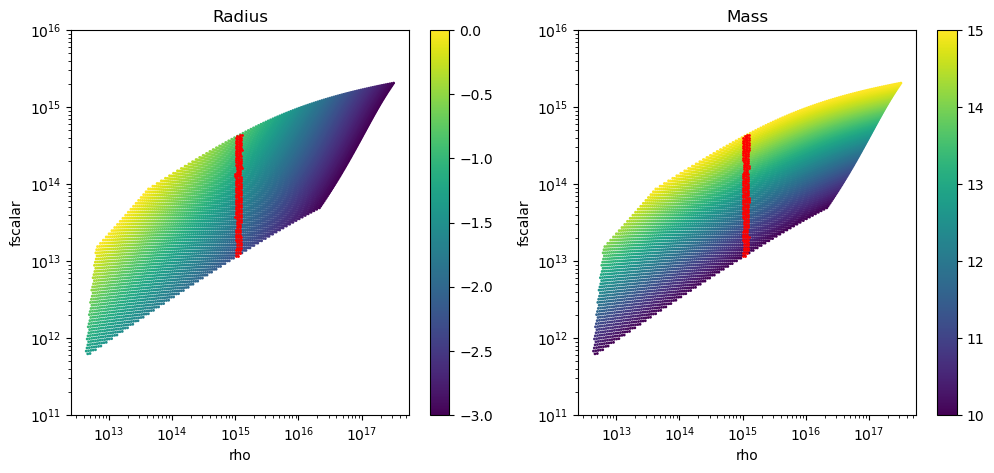

In [50]:
figure(figsize=[12,5])
subplot(121)

scatter((rh.flatten()),
        (f.flatten()),
        c=log10(r.flatten()),s=1.0)
xlabel('rho')
ylabel('fscalar')
xscale('log')
yscale('log')
colorbar()
title('Radius')
ylim(1e11,1e16)

scatter((rh.flatten())[mask],
        (f.flatten())[mask],
        c='red',s=1.0)

subplot(122)

scatter((rh.flatten()),
        (f.flatten()),
        c=log10(m.flatten()),s=1.0)
xlabel('rho')
ylabel('fscalar')
xscale('log')
yscale('log')
colorbar()
title('Mass')
ylim(1e11,1e16);

scatter((rh.flatten())[mask],
        (f.flatten())[mask],
        c='red',s=1.0)

/tmp/ipykernel_10965/3181471400.py:3: RuntimeWarning: divide by zero encountered in log10
  c=log10(rh.flatten())[mask]); colorbar()


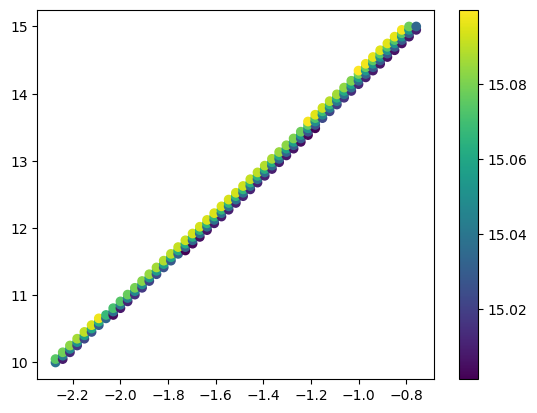

In [51]:
scatter(log10(r.flatten())[mask], 
        log10(m.flatten())[mask],
        c=log10(rh.flatten())[mask]); colorbar()

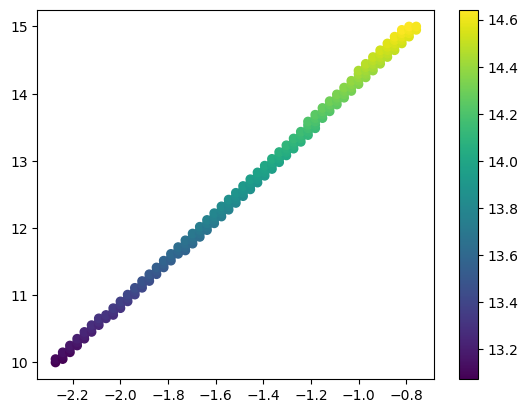

In [52]:
scatter(log10(r.flatten())[mask], 
        log10(m.flatten())[mask],
        c=log10(f.flatten())[mask]); colorbar()